<a href="https://colab.research.google.com/github/nusc2016/DS-Unit-2-Applied-Modeling/blob/master/Module2/Aaron_Huizenga_LS_DS_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [153]:
from IPython.display import display, Image
png = 'https://khn.org/wp-content/uploads/sites/2/2018/07/diabetes_1350x900.jpg'
example = Image(png, width=750)
display(example)

## I am going to be working with my own original data set.

In [0]:
# I need to be able to read in the data.

%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

In [0]:
!pip install -q matplotlib-venn

In [0]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [157]:
from google.colab import files
files.upload()

Saving diabetic.csv to diabetic (3).csv


{'diabetic.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [158]:
# This function will allow me to read the data.

df = pd.read_csv('diabetic.csv')
df.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

In [159]:
# Using the describe function to get a grip on the dataset.

df.describe()

Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

In [160]:
# Using the dtypes function to see the certain types within the dataset.

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [161]:
# Change column names: replace spaces with underscores
df.head(1)

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1

[1 rows x 9 columns]

In [162]:
df.rename(columns={'Pregnancies':'PREGNANCIES'}, inplace=True)
df.rename(columns={'Glucose':'GLUCOSE'}, inplace=True)
df.rename(columns={'BloodPressure':'BP'}, inplace=True)
df.rename(columns={'SkinThickness':'SKIN-THICKNESS'}, inplace=True)
df.rename(columns={'Insulin':'INSULIN'}, inplace=True)
df.rename(columns={'DiabetesPedigreeFunction':'DPF'}, inplace=True)
df.rename(columns={'Age':'AGE'}, inplace=True)
df.rename(columns={'Outcome':'OUTCOME'}, inplace=True)

print(df.shape)
df.head()

(768, 9)


PREGNANCIES  GLUCOSE  BP  SKIN-THICKNESS  INSULIN   BMI    DPF  AGE  OUTCOME
0            6      148  72              35        0  33.6  0.627   50        1
1            1       85  66              29        0  26.6  0.351   31        0
2            8      183  64               0        0  23.3  0.672   32        1
3            1       89  66              23       94  28.1  0.167   21        0
4            0      137  40              35      168  43.1  2.288   33        1

In [165]:
# Get Pandas Profiling Report

import pandas_profiling
pandas_profiling.ProfileReport(df)

In [166]:
# I want to remove any unusal rows within the dataset.

df_mod = df[(df.BP !=0) & (df.BMI !=0) & (df.GLUCOSE !=0)]

# This will print a new dataset after cleaning it.

print(df_mod.shape)

(724, 9)


In [167]:
# Not sure if this goes here, but there should be some sort of standardization
# done on this dataset. The following code should do just that.

scl = StandardScaler()
X = scl.fit_transform(X)
print(X[:5, :])

[[ 0.63502182  0.84993279  0.16456174  0.45842062]
 [-0.85286102 -1.20026207 -0.85226209 -0.37269083]
 [ 1.23017496  1.98892994 -1.33162189  0.59392792]
 [-0.85286102 -1.07009096 -0.63437127 -0.92676513]
 [-1.15043759  0.49196226  1.54453693  5.46014571]]


In [168]:
# The following will split the features(X) and target(y) into 70% to train the 
# model and 30% to test the model.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print("70% Features Training Data : ", X_train.shape)
print("30% Features Testing Data : ", X_test.shape)
print("70% Target Training Data : ", y_train.shape)
print("30% Target Testing Data : ", y_test.shape)

70% Features Training Data :  (506, 4)
30% Features Testing Data :  (218, 4)
70% Target Training Data :  (506,)
30% Target Testing Data :  (218,)


## Taking a different approach from yesterday, I want to inlude Feature Selection next.

In [0]:
feature_names = ['PREGNANCIES', 'GLUCOSE', 'BMI', 'DPF']
X = df_mod[feature_names]
y = df_mod.OUTCOME

## Next up is Model Selection

In [0]:
logreg = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

## Next up is the Train/Test Split

In [171]:
# The purpose of this cell is to split the data into train and test splits. 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy {}".format(accuracy))

Accuracy 0.7955801104972375


In [0]:
# Figure there is no better time than now to make class prediction on the test data.

y_pred = logreg.predict(X_test)

In [173]:
# This will check the predict shape

y_pred.shape

(181,)

## I used this in yesterday's assignment, but next is K-Fold Cross Validation.

In [174]:
accuracy = cross_val_score(logreg, X, y, cv = 10, scoring='accuracy').mean()

print("Accuracy {}".format(accuracy))

Accuracy 0.7790525114155251


In [175]:
# The following will check for the accuracy score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy Score : ", accuracy_score(y_test, y_pred), "\n")
print("Classification Report :\n", classification_report(y_test, y_pred), "\n")
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))

Accuracy Score :  0.7955801104972375 

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.91      0.85       119
           1       0.77      0.58      0.66        62

    accuracy                           0.80       181
   macro avg       0.79      0.74      0.76       181
weighted avg       0.79      0.80      0.79       181
 

Confusion Matrix :
 [[108  11]
 [ 26  36]]


In [176]:
y_pred_prob = logreg.predict_proba(X_test)
print(y_pred_prob[:5,:])

[[0.80085377 0.19914623]
 [0.70450063 0.29549937]
 [0.81765257 0.18234743]
 [0.45582948 0.54417052]
 [0.32622925 0.67377075]]


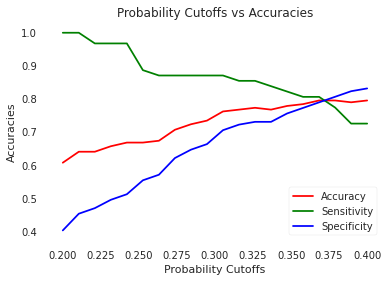

In [177]:
# The purpose for this Cut-off is that it respresents the probability that my 
# prediction is true.

p_cutoff = np.linspace(0.20,0.40,20)
acc = []
sen = []
spe = []

for pc in p_cutoff:
    y_test_pred = [1 if y>pc else 0 for y in y_pred_prob[:,1]]
    tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
    acc.append(accuracy_score(y_test,y_test_pred))
    sen.append(tp/(tp+fn))
    spe.append(tn/(tn+fp))

plt.plot(p_cutoff, acc, color='red', label="Accuracy")
plt.plot(p_cutoff, sen, color='green', label="Sensitivity")
plt.plot(p_cutoff, spe, color='blue', label="Specificity")
plt.xlabel("Probability Cutoffs")
plt.ylabel("Accuracies")
plt.title("Probability Cutoffs vs Accuracies")
plt.legend(loc=4)
plt.show()

## Next I want to plot a Confusion Matrix

In [0]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [179]:
# It was shown previously in checking for the accuracy score, but I will need this
# in order to plot it correctly.

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[108  11]
 [ 26  36]]


Confusion matrix, without normalization
[[108  11]
 [ 26  36]]


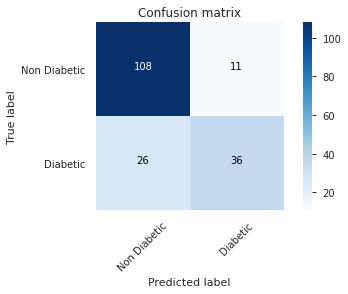

In [180]:
# As stated in yesterday's assignment, if you are designated 0 you are a non-diabetic
# where as a 1 designates you a diabetic.

plot_confusion_matrix(confusion, classes=['Non Diabetic', 'Diabetic'], title='Confusion matrix')

## Next up I will input the metrics from the confusion matrix. Included will be 'Classification Accuracy', 'Recall', 'Specificity', 'False-Positive Rate' & 'Precision'.

In [0]:
from sklearn.metrics import recall_score, precision_score

In [0]:
# Start off by defining certain functions that I will need.

# True Positive
TP = confusion[1, 1]

# True Negatives
TN = confusion[0, 0]

# False Positive
FP = confusion[0, 1]

# False Negative
FN = confusion[1, 0]

In [183]:
# I will start off with Classification Accuracy.

print((TP + TN) / float(TP + TN + FP +FN))
print(accuracy_score(y_test, y_pred))

0.7955801104972375
0.7955801104972375


In [184]:
# Next will be Recall

print(TP / float(TP + FN))
print(recall_score(y_test, y_pred))

0.5806451612903226
0.5806451612903226


In [185]:
# Next will be specificity

print(TN / float(TN +FP))

0.907563025210084


In [186]:
# Next will be False Positive Rate

print(FP / float(TN + FP))

0.09243697478991597


In [187]:
# Lastly I will calculate Precision

print(TP / float(TP + FP))
print(precision_score(y_test, y_pred))

0.7659574468085106
0.7659574468085106


## Taking it a step further, I want to calculate the TPR and the FPR and eventually plot the difference using the ROC accuracy and curve.

In [188]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
print("False Positive Rate (FPR) :\n", fpr.shape, "\n")
print("True Positive Rate (TPR) :\n", tpr.shape, "\n")
print("Threshold Values :\n\n", thresholds)

False Positive Rate (FPR) :
 (62,) 

True Positive Rate (TPR) :
 (62,) 

Threshold Values :

 [1.94110857 0.94110857 0.87308996 0.87109357 0.77493453 0.74247768
 0.71326527 0.712856   0.69358741 0.67377075 0.64808321 0.64704309
 0.6382392  0.63580342 0.6027458  0.5997264  0.5982045  0.59160499
 0.56775007 0.55003967 0.5377017  0.52338002 0.50162331 0.49551188
 0.4919069  0.48108705 0.47676375 0.47061663 0.46170705 0.44223239
 0.41850214 0.40738575 0.40230935 0.39404616 0.38649201 0.38487785
 0.38323265 0.37857178 0.37169327 0.37144885 0.3707388  0.35561517
 0.34589989 0.33884862 0.33199714 0.30877612 0.30742568 0.26463618
 0.25510556 0.25230787 0.2510918  0.24938617 0.24762101 0.24682561
 0.24341196 0.2429454  0.24294403 0.22298549 0.21874344 0.21661192
 0.21623031 0.06136381]


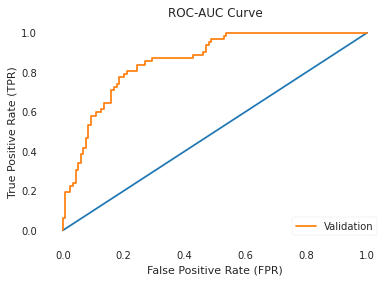

In [189]:
# This will give you a visualization of the two rates

plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label="Validation")
plt.legend(loc=4)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curve");

In [190]:
# The following function will calculate the area under the curve

AUC_Score = roc_auc_score(y_test, y_pred_prob[:,1])
print("AUC Score : ", AUC_Score)

AUC Score :  0.8587693141772839


## Yesterday I worked with the K-Fold Model. Today I want to use the KNN(K-Nearest Neighbors) Model.

In [191]:
# I will start with importing and creating the object of the LR model.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# Now I need to fit the model

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [192]:
# Next I will make class predicts on train and test data while checking shapes. 

y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)
print(y_train_pred_knn.shape)
print(y_test_pred_knn.shape)

(543,)
(181,)


In [193]:
# Using a 10 fold I will calculate the model's accuracy.
from sklearn.model_selection import KFold

folds = KFold(n_splits=5, shuffle=False, random_state=None)
CrossValScoreKnn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=folds, verbose=1)
print("Cross Validation Score of 5 folds : ", CrossValScoreKnn, "\n")
print("Average Cross Validation Score 5 folds : ", np.mean(CrossValScoreKnn))

Cross Validation Score of 5 folds :  [0.69724771 0.6146789  0.57798165 0.66666667 0.71296296] 

Average Cross Validation Score 5 folds :  0.6539075773020726


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [194]:
# I have tried this numerous times, so I hope that this will finally be the one 
# that works. The following function will calculate the KNN score, Accuracy Score
# and the classification report. 

print("Training KNN Score for K=1 : ", knn.score(X_train, y_train), "\n")
print("Training Accuracy Score for K=1 : ", accuracy_score(y_train, y_train_pred_knn), "\n")
print("Training Classification Report for K=1 :\n", classification_report(y_train, y_train_pred_knn), "\n")
print("_"*100)
print("Training KNN Score for K=1 : ", knn.score(X_test, y_test), "\n")
print("Testing Accuracy Score for K=1 : ", accuracy_score(y_test, y_test_pred_knn), "\n")
print("Testing Classification Report K=1 :\n", classification_report(y_test, y_test_pred_knn), "\n")

Training KNN Score for K=1 :  1.0 

Training Accuracy Score for K=1 :  1.0 

Training Classification Report for K=1 :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00       187

    accuracy                           1.00       543
   macro avg       1.00      1.00      1.00       543
weighted avg       1.00      1.00      1.00       543
 

____________________________________________________________________________________________________
Training KNN Score for K=1 :  0.6629834254143646 

Testing Accuracy Score for K=1 :  0.6629834254143646 

Testing Classification Report K=1 :
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       119
           1       0.51      0.53      0.52        62

    accuracy                           0.66       181
   macro avg       0.63      0.63      0.63       181
weighted avg       0.67      0.66   

In [0]:
# This cell will tune the KNN model from 1 to 15 in order to get the best value 
# of K.

neighbors = np.arange(1,15)
training_accuracy = np.empty(len(neighbors))
testing_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    training_accuracy[i] = knn.score(X_train, y_train)
    testing_accuracy[i] = knn.score(X_test, y_test)

In [196]:
# This cell will check the Train and Test data set after tuning it.

print("Training KNN for K=1 to 15 :", training_accuracy.shape, "\n")
print("Testing KNN for K=1 to 15 : ", testing_accuracy.shape, "\n")

Training KNN for K=1 to 15 : (14,) 

Testing KNN for K=1 to 15 :  (14,) 



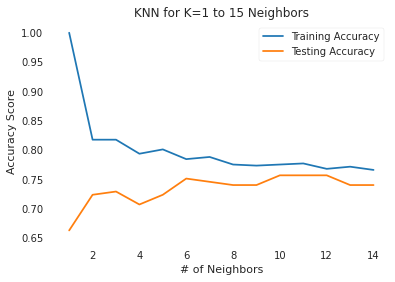

In [197]:
# Finally a visualization of K=1 to 15

plt.plot(neighbors, training_accuracy, label="Training Accuracy")
plt.plot(neighbors, testing_accuracy, label="Testing Accuracy")
plt.legend(loc=0)
plt.xlabel("# of Neighbors")
plt.ylabel("Accuracy Score")
plt.title("KNN for K=1 to 15 Neighbors")
plt.show()

In [198]:
# In this visualization it appears that the best value of K is 11. This is due 
# in part because the difference between Test and Train accuracy is less and the 
# accuracy appears to be less as it continues. So what I'll do here is fit the 
# model for K=11

tuned_knn = KNeighborsClassifier(n_neighbors=11)
tuned_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [199]:
# Now I will calculate the CVS, Train and Test scores for K=11

folds = KFold(n_splits=5, shuffle=False, random_state=None)
CrossValScore_knn = cross_val_score(estimator=tuned_knn, X=X_train, y=y_train, cv=folds, verbose=1)
print("Cross Validarion Score of 5 folds for K=11 : ", CrossValScore_knn, "\n")

print("Average Cross Validarion Score for K=11 : ", np.mean(CrossValScore_knn), "\n")

print("Training KNN Score for K=11 : ", tuned_knn.score(X_train, y_train), "\n")

print("Testing KNN Score for K=11 : ", tuned_knn.score(X_test, y_test), "\n")

Cross Validarion Score of 5 folds for K=11 :  [0.73394495 0.69724771 0.67889908 0.75925926 0.83333333] 

Average Cross Validarion Score for K=11 :  0.7405368671423719 

Training KNN Score for K=11 :  0.7771639042357275 

Testing KNN Score for K=11 :  0.7569060773480663 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


### The purpose for me running different models was to see which would best fit the dataset that I am working with. With the LR Model tipping the iceberg at just over 80%, it's clear that this is the model that best fits the dataset, and is what I should be moving forward with.